In [2]:
# CNN classification on CIFAR-10 dataset
# loading libraries
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

11490434/11490434 [==============================] - 1s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


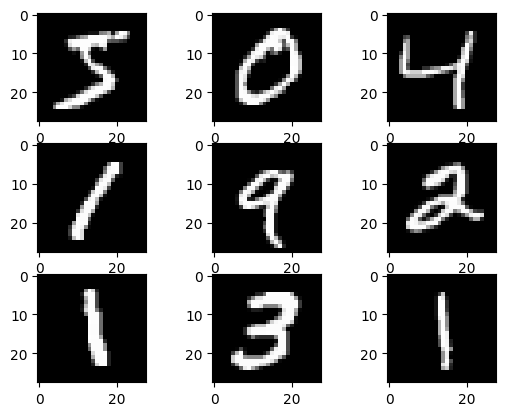

In [3]:
# Load the MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# Print the shape of the training and testing data
print("Training data shape:", trainX.shape, trainY.shape)
print("Testing data shape:", testX.shape, testY.shape)

# plotting first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

170498071/170498071 [==============================] - 7s 0us/step
Train: X=(50000, 32, 32, 3), Y=(50000, 1)
Test: X=(10000, 32, 32, 3), Y=(10000, 1)


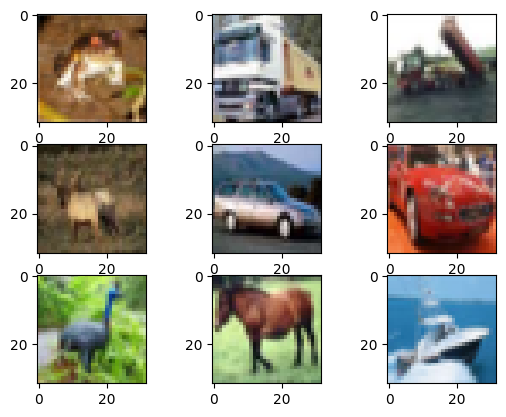

In [4]:
# loading dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Shape of dataset
print('Train: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, Y=%s' % (testX.shape, testY.shape))

# plotting first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i])
pyplot.show()

In [5]:
# load dataset
def load_dataset(name):
    # load dataset
    (trainX, trainY), (testX, testY) = name.load_data()
    # shape of dataset
    train_shape, test_shape = [trainX.shape, trainY.shape], [testX.shape, testY.shape]
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY, train_shape, test_shape

In [6]:
# prepare pixel data
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))
def define_model(in_shape):
  with tf.device(device_name):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(in_shape, in_shape, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

No GPU, using /device:CPU:0.


In [8]:
# learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [14]:
from tqdm import tqdm
from keras.callbacks import Callback
class tqdm_cb(Callback):
    def __init__(self, total):
        super().__init__()
        self.total = total
        self.pbar = None

    def on_train_begin(self, logs=None):
        self.pbar = tqdm(total=self.total, desc='Training model')

    def on_epoch_end(self, epoch, logs=None):
        self.pbar.update(1)
        self.pbar.set_postfix(loss=logs['loss'], accuracy=logs['accuracy'])

    def on_train_end(self, logs=None):
        self.pbar.close()

def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY, train_shape, _ = load_dataset(cifar10)
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    x = train_shape[0][1]
    model = define_model(x)
    # fit model use tqdm_cb
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0, callbacks=[tqdm_cb(100)])
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    model.save('cnn_model')

Training model: 100%|██████████| 100/100 [06:22<00:00,  3.82s/it, accuracy=1, loss=1.52e-5]


> 68.820


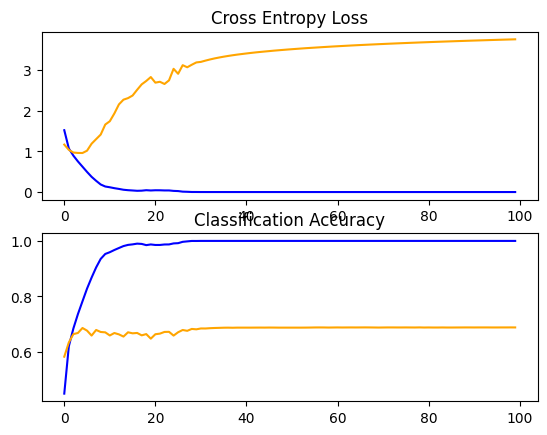

In [15]:
run_test_harness()